In [1]:
DATA_PATH_HD="../data/processed/IAM.PA.pkl"

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [3]:
df=pd.read_pickle(DATA_PATH_HD)

In [4]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

247

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.61538462],
       [0.76923077],
       [0.69230769],
       [0.76923077],
       [0.61538462],
       [0.69230769],
       [0.84615385],
       [0.84615385],
       [0.76923077],
       [0.76923077],
       [0.84615385],
       [0.92307692],
       [1.        ],
       [0.76923077],
       [0.61538462],
       [0.69230769],
       [0.69230769],
       [0.69230769],
       [0.46153846],
       [0.30769231],
       [0.15384615],
       [0.        ],
       [0.        ],
       [0.07692308],
       [0.23076923],
       [0.23076923],
       [0.15384615],
       [0.23076923],
       [0.15384615],
       [0.15384615],
       [0.15384615],
       [0.15384615],
       [0.07692308],
       [0.23076923],
       [0.15384615],
       [0.23076923],
       [0.30769231],
       [0.30769231],
       [0.30769231],
       [0.30769231],
       [0.23076923],
       [0.23076923],
       [0.30769231],
       [0.23076923],
       [0.23076923],
       [0.30769231],
       [0.30769231],
       [0.346

In [8]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.61538462, 0.76923077, 0.69230769, 0.76923077, 0.61538462,
       0.69230769, 0.84615385, 0.84615385, 0.76923077, 0.76923077,
       0.84615385, 0.92307692, 1.        , 0.76923077, 0.61538462,
       0.69230769, 0.69230769, 0.69230769, 0.46153846, 0.30769231,
       0.15384615, 0.        , 0.        , 0.07692308, 0.23076923,
       0.23076923, 0.15384615, 0.23076923, 0.15384615, 0.15384615,
       0.15384615, 0.15384615, 0.07692308, 0.23076923, 0.15384615,
       0.23076923, 0.30769231, 0.30769231, 0.30769231, 0.30769231,
       0.23076923, 0.23076923, 0.30769231, 0.23076923, 0.23076923,
       0.30769231, 0.30769231, 0.34615385, 0.34615385, 0.30769231,
       0.30769231, 0.30769231, 0.30769231, 0.30769231, 0.30769231,
       0.38461538, 0.38461538, 0.30769231, 0.34615385, 0.30769231])]
[0.3076923076923084]

[array([0.61538462, 0.76923077, 0.69230769, 0.76923077, 0.61538462,
       0.69230769, 0.84615385, 0.84615385, 0.76923077, 0.76923077,
       0.84615385, 0.92307692, 1.   

In [9]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

187/187 [==============================] - 12s 30ms/step - loss: 0.0124


In [10]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

0.1066007258538654

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_7340/4089089161.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



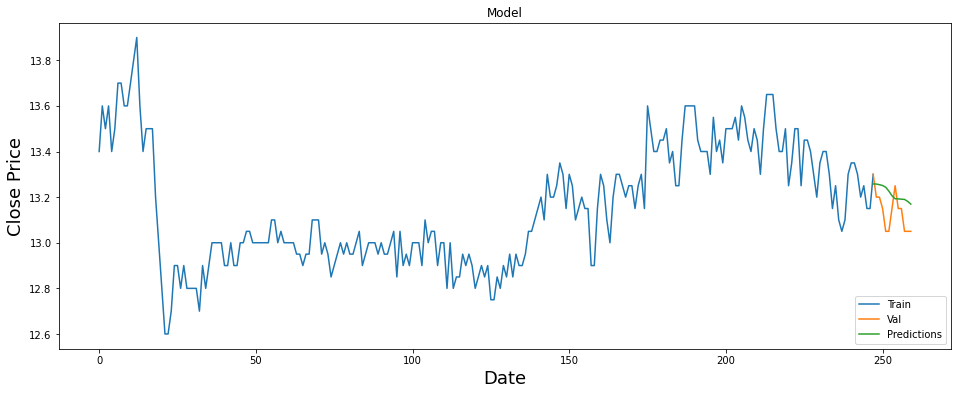

In [41]:
# Plot the data
train = data[:training_data_len+1]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [14]:
valid

,Close,Predictions
247,13.30,13.257662
248,13.20,13.257365
249,13.20,13.254577
250,13.15,13.250956
251,13.05,13.243294
252,13.05,13.226420
253,13.15,13.205953
254,13.25,13.192731
255,13.15,13.192160
256,13.15,13.191020
